In [ ]:
#import sys
#import os
#import matplotlib.pyplot as plt
#sys.path.append('/home/you/you_disk100T/brick')
#from bricks.brick_core import generate_bricks
#from bricks.brick_queries import BrickQueries
#from bricks.brick_projection import SinProjection
#print(sys.path)

In [1]:
from csst_brick import generate_bricks, BrickQueries, SinProjection
import matplotlib.pyplot as plt

In [2]:
all_bricks = generate_bricks(nside=8, overlap=1.5)

In [3]:
single_brick = generate_bricks(nside=8, brick_id=100, overlap=1.2)

In [4]:
brick_queries = BrickQueries(nside=8, overlap=1.2)

In [5]:
brick_queries.disc_bricks(10.0, 20.0, 10.0)

[Brick(brick_id=209, ra=11.25, dec=24.62431835216408, min_radius=5.375681647835949, radius=6.450817977403138, nside=8),
 Brick(brick_id=240, ra=5.625, dec=19.47122063449069, min_radius=5.30306401690585, radius=6.3636768202870195, nside=8),
 Brick(brick_id=241, ra=16.875, dec=19.47122063449069, min_radius=5.30306401690585, radius=6.3636768202870195, nside=8),
 Brick(brick_id=273, ra=11.25, dec=14.477512185929925, min_radius=5.446246005416524, radius=6.535495206499828, nside=8)]

In [6]:
brick_queries.neighbors(brick_id=100)

[Brick(brick_id=130, ra=208.125, dec=41.81031489577859, min_radius=6.555638082620897, radius=7.866765699145076, nside=8),
 Brick(brick_id=99, ra=199.28571428571428, dec=48.141207794360284, min_radius=6.752281989751824, radius=8.102738387702187, nside=8),
 Brick(brick_id=73, ra=202.5, dec=54.34091230386124, min_radius=6.5547479972529095, radius=7.865697596703491, nside=8),
 Brick(brick_id=51, ra=207.0, dec=60.43443884495228, min_radius=6.33309950365233, radius=7.599719404382796, nside=8),
 Brick(brick_id=74, ra=217.5, dec=54.34091230386124, min_radius=6.235684911206465, radius=7.482821893447758, nside=8),
 Brick(brick_id=101, ra=225.0, dec=48.141207794360284, min_radius=6.330892898581733, radius=7.597071478298079, nside=8),
 Brick(brick_id=131, ra=219.375, dec=41.81031489577859, min_radius=6.356258684639236, radius=7.6275104215670835, nside=8),
 Brick(brick_id=163, ra=213.75, dec=35.68533471265204, min_radius=6.124980183126592, radius=7.34997621975191, nside=8)]

In [7]:
brick_queries.nearest(ra=-180, dec=90)

(Brick(brick_id=2, ra=225.0, dec=84.14973293629666, min_radius=5.865585331189059, radius=7.03870239742687, nside=8),
 5.850267063703354)

In [8]:
brick_queries.contains_point(ra=212.14285714285714, dec=44.141207794360284, brick_id=10)

(False, 45.06297721696938)

In [9]:
brick_queries.find_bricks(ra=212.14285714285714, dec=44.141207794360284)

[Brick(brick_id=100, ra=212.14285714285714, dec=48.141207794360284, min_radius=6.4317533733575125, radius=7.718104048029015, nside=8),
 Brick(brick_id=130, ra=208.125, dec=41.81031489577859, min_radius=6.555638082620897, radius=7.866765699145076, nside=8),
 Brick(brick_id=131, ra=219.375, dec=41.81031489577859, min_radius=6.356258684639236, radius=7.6275104215670835, nside=8)]

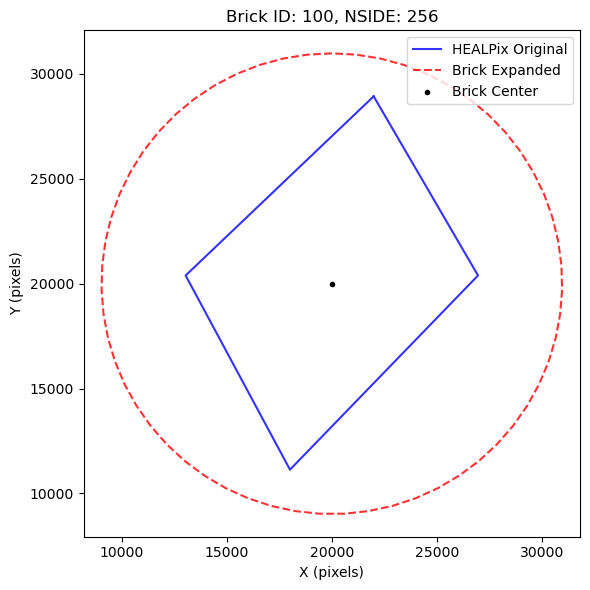

In [10]:
nside = 256
brick_id = 100

brick = generate_bricks(nside, brick_id, overlap=1.2)
proj = SinProjection(brick, pixel_scale=0.074)

x_o, y_o = proj.project_to_sin(mode="healpix") 
x_b, y_b = proj.project_to_sin(mode="brick")   
ra_o, dec_o = proj.project_to_sin(mode="healpix")
x_o, y_o = proj.world2pix(ra_o, dec_o)

ra_b, dec_b = proj.project_to_sin(mode="brick")
x_b, y_b = proj.world2pix(ra_b, dec_b)

plt.figure(figsize=(6, 6))
plt.plot(list(x_o) + [x_o[0]], list(y_o) + [y_o[0]], 'b-', alpha=0.8, label="HEALPix Original")
plt.plot(list(x_b) + [x_b[0]], list(y_b) + [y_b[0]], 'r--', alpha=0.8, label="Brick Expanded")
plt.scatter(20000, 20000, color='black', marker='.', label="Brick Center")

plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.title(f"Brick ID: {brick_id}, NSIDE: {nside}")
plt.legend(loc='upper right', fontsize=10, frameon=True)
plt.tight_layout()  
#plt.grid(True)
plt.axis('equal')  
plt.show()


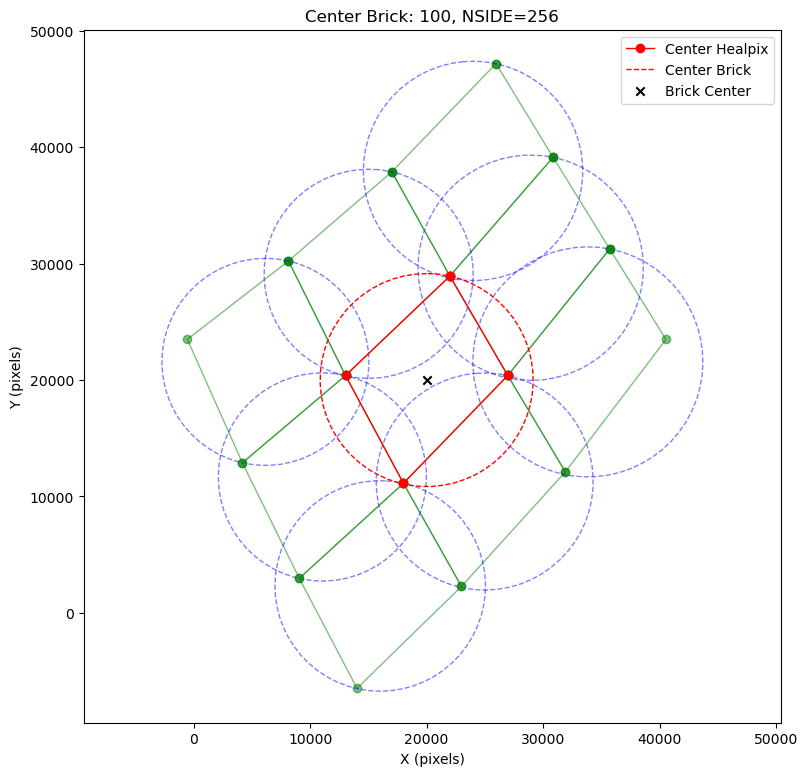

In [11]:

nside = 256
brick_id = 100

# center_brick
center_brick = generate_bricks(nside, brick_id, overlap=1)
proj = SinProjection(center_brick, pixel_scale=0.074)

ra_c, dec_c = proj.project_to_sin(mode="healpix", n_points=60)
x_c, y_c = proj.world2pix(ra_c, dec_c)

ra_cb, dec_cb = proj.project_to_sin(mode="brick", n_points=60)
x_cb, y_cb = proj.world2pix(ra_cb, dec_cb)

# neighbor_bricks
bq = BrickQueries(nside=nside, overlap=1)
neighbor_bricks = bq.get_neighbor_bricks(brick_id=brick_id)
plt.figure(figsize=(9, 9))

for nb in neighbor_bricks:
    proj_nb = SinProjection(nb, pixel_scale=0.074)
    ra_o, dec_o = proj_nb.project_to_sin(mode="healpix", n_points=60)
    x_nb, y_nb = proj.world2pix(ra_o, dec_o)
    plt.plot(list(x_nb) + [x_nb[0]], list(y_nb) + [y_nb[0]],
             'o-g', alpha=0.5, linewidth=1)

    ra_ob, dec_ob = proj_nb.project_to_sin(mode="brick", n_points=60)
    x_nbb, y_nbb = proj.world2pix(ra_ob, dec_ob)
    plt.plot(list(x_nbb) + [x_nbb[0]], list(y_nbb) + [y_nbb[0]],
             'b--', alpha=0.5, linewidth=1)

plt.plot(list(x_c) + [x_c[0]], list(y_c) + [y_c[0]],'o-r', linewidth=1, label="Center Healpix")
plt.plot(list(x_cb) + [x_cb[0]], list(y_cb) + [y_cb[0]],'r--', linewidth=1, label="Center Brick")
plt.scatter(20000, 20000, color='black', marker='x', label="Brick Center")

plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.title(f"Center Brick: {brick_id}, NSIDE={nside}")
plt.legend(loc='best')
plt.axis('equal')
plt.show()